In [9]:
import pandas as pd
df = pd.read_csv('/tmp/Womens Clothing E-Commerce Reviews.csv')
df = df.drop(columns=['Clothing ID',	'Age',	'Title',	'Recommended IND',	'Positive Feedback Count',	'Division Name',	'Department Name',	'Class Name'])

In [10]:
df.head()

,Unnamed: 0,Review Text,Rating
0,0,Absolutely wonderful - silky and sexy and comf...,4
1,1,Love this dress! it's sooo pretty. i happene...,5
2,2,I had such high hopes for this dress and reall...,3
3,3,"I love, love, love this jumpsuit. it's fun, fl...",5
4,4,This shirt is very flattering to all due to th...,5


In [11]:
df.drop("Unnamed: 0",axis=1)

,Review Text,Rating
0,Absolutely wonderful - silky and sexy and comf...,4
1,Love this dress! it's sooo pretty. i happene...,5
2,I had such high hopes for this dress and reall...,3
3,"I love, love, love this jumpsuit. it's fun, fl...",5
4,This shirt is very flattering to all due to th...,5
...,...,...
23481,I was very happy to snag this dress at such a ...,5
23482,"It reminds me of maternity clothes. soft, stre...",3
23483,"This fit well, but the top was very see throug...",3
23484,I bought this dress for a wedding i have this ...,3


In [12]:
category = pd.get_dummies(df.Rating)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='Rating')
df_baru

,Unnamed: 0,Review Text,1,2,3,4,5
0,0,Absolutely wonderful - silky and sexy and comf...,0,0,0,1,0
1,1,Love this dress! it's sooo pretty. i happene...,0,0,0,0,1
2,2,I had such high hopes for this dress and reall...,0,0,1,0,0
3,3,"I love, love, love this jumpsuit. it's fun, fl...",0,0,0,0,1
4,4,This shirt is very flattering to all due to th...,0,0,0,0,1
...,...,...,...,...,...,...,...
23481,23481,I was very happy to snag this dress at such a ...,0,0,0,0,1
23482,23482,"It reminds me of maternity clothes. soft, stre...",0,0,1,0,0
23483,23483,"This fit well, but the top was very see throug...",0,0,1,0,0
23484,23484,I bought this dress for a wedding i have this ...,0,0,1,0,0


In [13]:
df_baru.drop("Unnamed: 0",axis=1)

,Review Text,1,2,3,4,5
0,Absolutely wonderful - silky and sexy and comf...,0,0,0,1,0
1,Love this dress! it's sooo pretty. i happene...,0,0,0,0,1
2,I had such high hopes for this dress and reall...,0,0,1,0,0
3,"I love, love, love this jumpsuit. it's fun, fl...",0,0,0,0,1
4,This shirt is very flattering to all due to th...,0,0,0,0,1
...,...,...,...,...,...,...
23481,I was very happy to snag this dress at such a ...,0,0,0,0,1
23482,"It reminds me of maternity clothes. soft, stre...",0,0,1,0,0
23483,"This fit well, but the top was very see throug...",0,0,1,0,0
23484,I bought this dress for a wedding i have this ...,0,0,1,0,0


In [17]:
x = df_baru['Review Text'].values
y = df_baru[[1,	2,	3,	4,	5]].values

In [18]:
from sklearn.model_selection import train_test_split
x_latih, x_test, y_latih, y_test = train_test_split(x, y, test_size=0.2)
df_baru['Review Text']= df_baru['Review Text'].astype('str')

In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
 
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(x_latih) 
tokenizer.fit_on_texts(x_test)
 
sekuens_latih = tokenizer.texts_to_sequences(x_latih)
sekuens_test = tokenizer.texts_to_sequences(x_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)


In [22]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

max_features = 20000 
maxlen = 200

inputs = keras.Input(shape=(None,), dtype="int32")
review = layers.Embedding(max_features, 128)(inputs)
review = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(review)
review = layers.Bidirectional(layers.LSTM(64))(review)
outputs = layers.Dense(1, activation="sigmoid")(review)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding (Embedding)        (None, None, 128)         2560000   
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         98816     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 2,757,761
Trainable params: 2,757,761
Non-trainable params: 0
_________________________________________________________________


In [23]:
(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(
    num_words=max_features
)
print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=maxlen)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

25000 Training sequences
25000 Validation sequences


In [25]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9 and logs.get('val_accuracy') > 0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [31]:
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=5, epochs=2, validation_data=(x_val, y_val),callbacks=[callbacks])

Epoch 1/2
5000/5000 [==============================] - 1554s 310ms/step - loss: 0.0926 - accuracy: 0.9683 - val_loss: 0.3842 - val_accuracy: 0.8702
Epoch 2/2
5000/5000 [==============================] - 1554s 311ms/step - loss: 0.0516 - accuracy: 0.9839 - val_loss: 0.4578 - val_accuracy: 0.8608


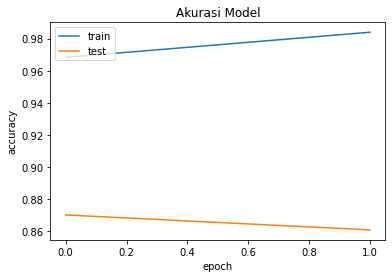

In [32]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

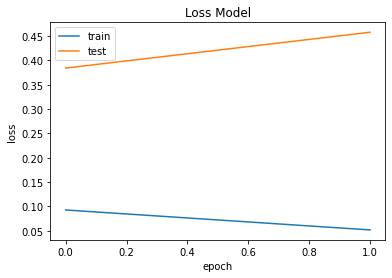

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()